In [1]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

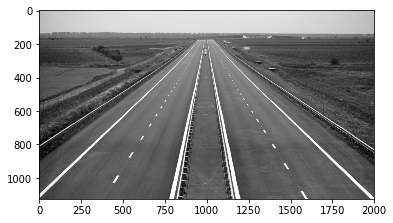

In [2]:
# read image as grayscale
img = cv2.imread('AB1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray,(5,5),0)
plt.imshow(img_gray, cmap='gray');

### Edge detector

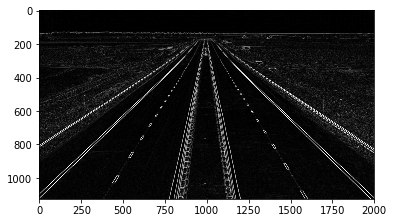

In [3]:
grad_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.imshow(grad, cmap='gray');
plt.imsave("sobel.png", grad, cmap='gray')

### Binarization

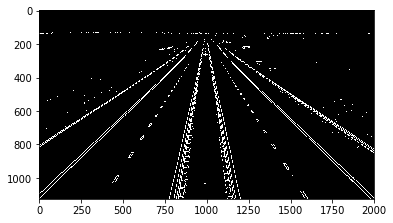

In [4]:
ret,binary = cv2.threshold(grad,80,255,cv2.THRESH_BINARY)
binary = binary.astype('uint8')

plt.imshow(binary, cmap='gray');
plt.imsave("binary.png", binary, cmap='gray')

### Hough Transformation

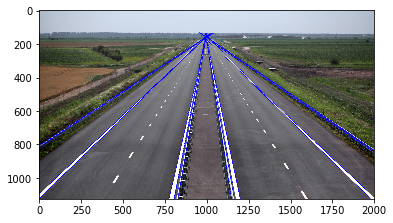

In [5]:
linesP = cv2.HoughLinesP(binary, 1, np.pi / 180, 500, None, 80, 200)
img_new = img.copy()
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(img_new, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)
    
plt.imshow(img_new)
plt.imsave("hough_sobel.png", img_new)

### Plot

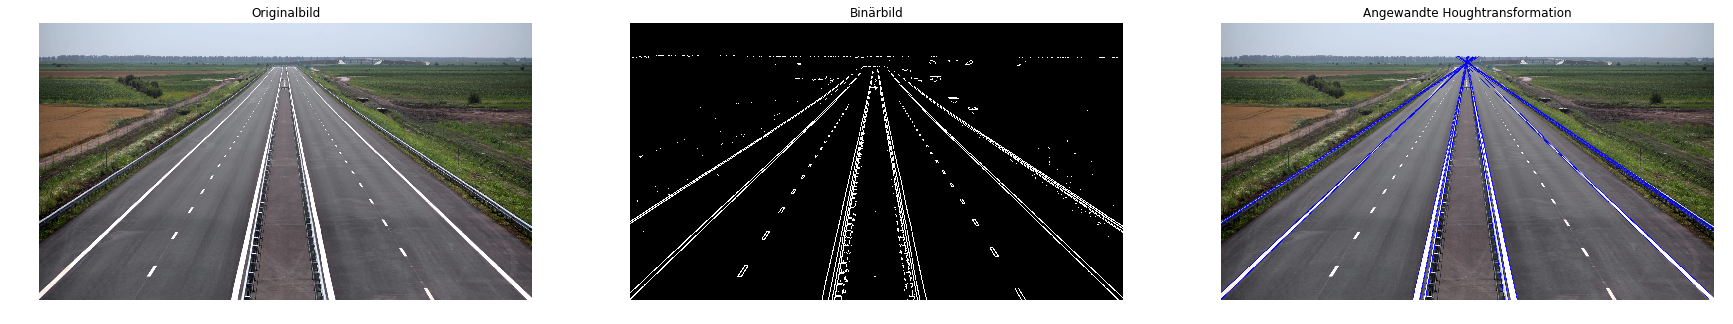

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

axs[0].imshow(img);
axs[0].set_title('Originalbild');
axs[0].axis('off')

axs[1].imshow(binary, cmap='gray');
axs[1].set_title('Binärbild');
axs[1].axis('off')

axs[2].imshow(img_new);
axs[2].set_title('Angewandte Houghtransformation');
axs[2].axis('off')


plt.savefig('Houghtransformation.png')